# Churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Drago/Desktop/churn.csv')

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df = df.drop('customerID', axis=1)

In [6]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No', value=0, inplace=True)

In [10]:
df_1 = pd.get_dummies(df)

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   SeniorCitizen_0                          7032 non-null   uint8  
 7   SeniorCitizen_1                          7032 non-null   uint8  
 8   Partner_No                               7032 non-null   uint8  
 9   Partner_Yes                              7032 non-null   uint8  
 10  Dependents_No                            7032 no

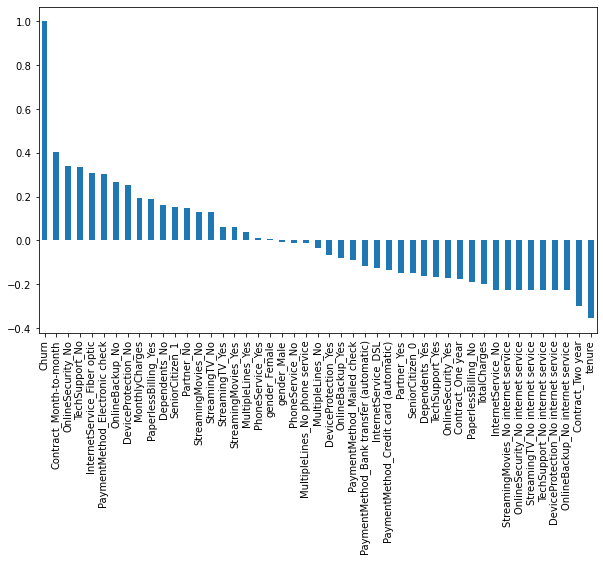

In [12]:
plt.figure(figsize=(10,6))
df_1.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

- Monthly contract, absense of online security/techsupport are postively coorelated with churn
- Tenure, two year contracts are negatively correlated with churn
- Streaming movies, onlinesecurity, streaming tv, techsupport, deviceprotection, and oneline backup without internet connection are negatively correlated to churn

## EDA

### Demographics

#### Gender Distributions

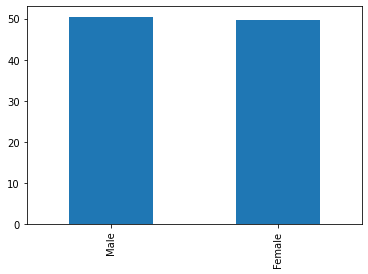

In [13]:
gender = (df['gender'].value_counts()*100/len(df)).plot(kind='bar')

#### Senior Citizens

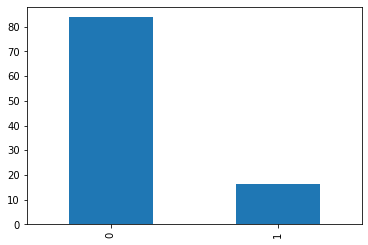

In [14]:
senior = (df['SeniorCitizen'].value_counts()*100/len(df)).plot(kind='bar')

#### Tenure

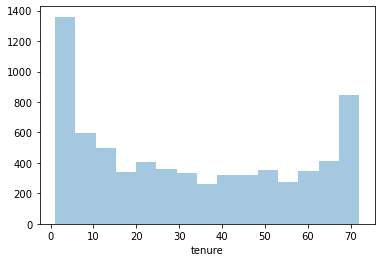

In [15]:
sns.distplot(df['tenure'],hist=True,kde=False)

In [16]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Contract

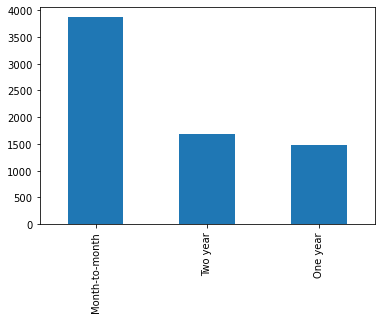

In [17]:
contract = df['Contract'].value_counts().plot(kind='bar')

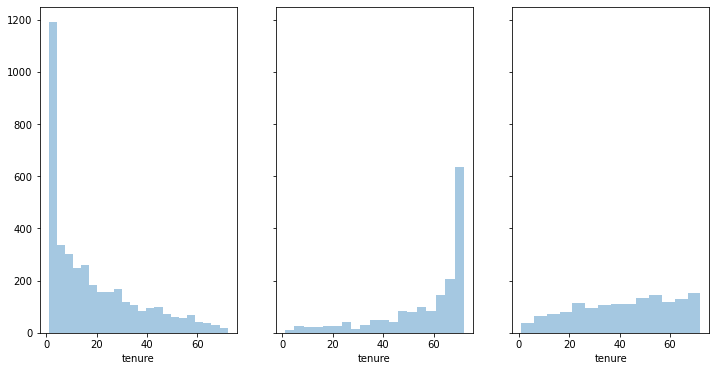

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,6),sharey=True)
sns.distplot(df[df['Contract'] == 'Month-to-month']['tenure'],kde=False,ax=ax1)
sns.distplot(df[df['Contract'] == 'Two year']['tenure'],kde=False, ax=ax2)
sns.distplot(df[df['Contract'] == 'One year']['tenure'],kde=False,ax=ax3)

#### Churn balance

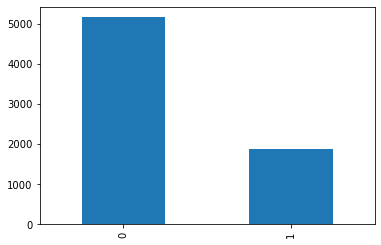

In [19]:
df.Churn.value_counts().plot(kind='bar')

#### Churn VS Tenure

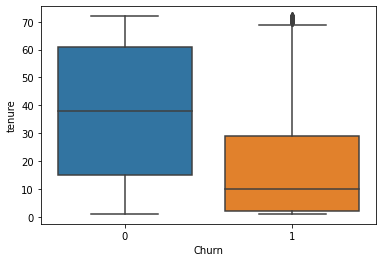

In [20]:
sns.boxplot(x='Churn',y='tenure',data=df)

In [21]:
X = df_1.drop('Churn', axis=1)
y = df_1['Churn']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [23]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

## Logistic Regression

[[929 117]
 [153 208]]
LR Accuracy Score: 0.8081023454157783
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1046
           1       0.64      0.58      0.61       361

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

CV Mean: 0.8050335601003316
CV std: 0.004853566802726583


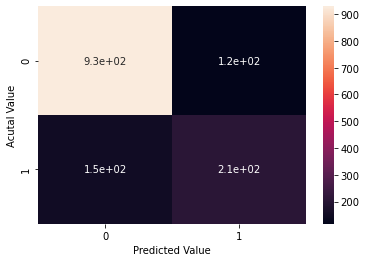

In [40]:
lr = LogisticRegression(class_weight='balance', random_state=10)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
cfm_lr = confusion_matrix(y_test, lr_pred)
print(cfm_lr)
tn1, fp1, fn1, tp1 = cfm_lr.flatten()
sns.heatmap(cfm_lr, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Acutal Value')
lr_accu = accuracy_score(y_test, lr_pred)
print('LR Accuracy Score:',acc_lr)
print(classification_report(y_test, lr_pred))
lr_cv = cross_val_score(lr, X, y, cv=5, n_jobs=-1)
print('CV Mean:', lr_cv.mean())
print('CV std:', lr_cv.std())

### Hyperparameter Tuning

In [25]:
param_grid_lr = {'C': [0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 1]}
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, verbose=True, n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train)
grid_search_lr.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.2s finished


{'C': 0.5}

In [26]:
grid_search_lr.best_estimator_

LogisticRegression(C=0.5, class_weight='balance', random_state=10)

[[929 117]
 [153 208]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1046
           1       0.64      0.58      0.61       361

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407

CV Mean: 0.804749469478456
CV std: 0.00506908905467687


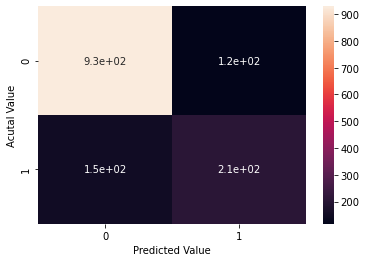

In [27]:
lr2 = LogisticRegression(C=0.5, class_weight='balance', random_state=10)
lr2.fit(X_train_scaled, y_train)
lr_pred2 = lr2.predict(X_test_scaled)
cfm_lr2 = confusion_matrix(y_test, lr_pred)
print(cfm_lr2)
tn2, fp2, fn2, tp2 = cfm_lr2.flatten()
lr_accu2 = accuracy_score(y_test,lr_pred2)
sns.heatmap(cfm_lr2, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Acutal Value')
print(classification_report(y_test, lr_pred2))
lr_cv2 = cross_val_score(lr2, X, y, cv=5, n_jobs=-1)
print('CV Mean:', lr_cv2.mean())
print('CV std:', lr_cv2.std())

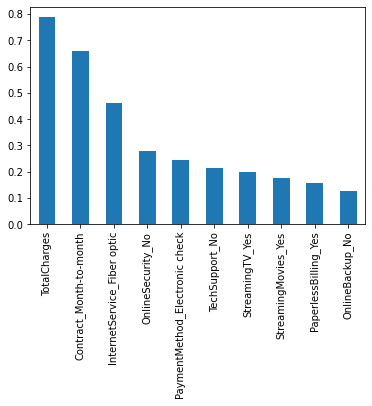

In [28]:
weight_lr = pd.Series(lr2.coef_[0], index=X.columns.values)
weight_lr.sort_values(ascending=False)[:10].plot(kind='bar')

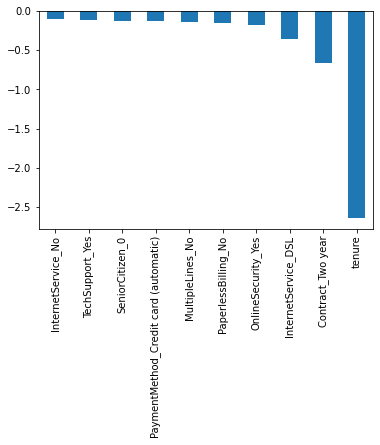

In [29]:
weight_lr.sort_values(ascending=False)[-10:].plot(kind='bar')

## Support Vector Machine

[[939 107]
 [157 204]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1046
           1       0.66      0.57      0.61       361

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.81      0.81      1407

CV Mean: 0.7935149491316027
CV std: 0.010743230457053983


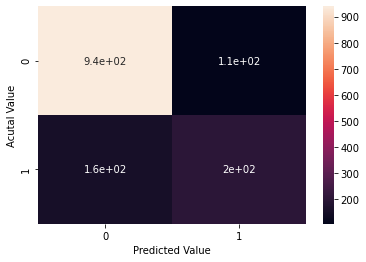

In [60]:
sv = SVC(kernel='linear')
sv.fit(X_train_scaled, y_train)
sv_pred = sv.predict(X_test_scaled)
cfm_sv = confusion_matrix(y_test, sv_pred)
print(cfm_sv)
tn3, fp3, fn3, tp3 = cfm_sv.flatten()
sv_accu = accuracy_score(y_test, sv_pred)
sns.heatmap(cfm_sv, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Acutal Value')
print(classification_report(y_test, sv_pred))
sv_cv = cross_val_score(sv, X, y, cv=5, n_jobs=-1)
print('CV Mean:', sv_cv.mean())
print('CV std:', sv_cv.std())

### Hyperparameter Tuning

In [53]:
param_grid_svc = {'C': [0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 1],
                 'kernel': ['linear','rbf'],
                 'gamma': ['scale','auto']}
param_grid_svc = GridSearchCV(sv,param_grid_svc,cv=5,verbose=True, n_jobs=-1)
param_grid_svc.fit(X_train_scaled,y_train)
param_grid_svc.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   37.8s finished


{'C': 0.05, 'gamma': 'scale', 'kernel': 'linear'}

In [51]:
param_grid_svc.best_estimator_

SVC(C=0.05, kernel='linear')

[[939 107]
 [160 201]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1046
           1       0.65      0.56      0.60       361

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407

CV Mean: 0.7972099470135605
CV std: 0.01059439702256503


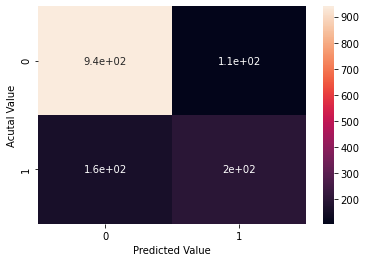

In [64]:
sv2 = SVC(C=0.05, kernel='linear',gamma='scale')
sv2.fit(X_train_scaled, y_train)
sv_pred2 = sv2.predict(X_test_scaled)
cfm_sv2 = confusion_matrix(y_test, sv_pred2)
print(cfm_sv2)
tn4, fp4, fn4, tp4 = cfm_sv2.flatten()
sv_accu2 = accuracy_score(y_test,sv_pred2)
sns.heatmap(cfm_sv2, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Acutal Value')
print(classification_report(y_test, sv_pred2))
sv_cv2 = cross_val_score(sv2, X, y, cv=5, n_jobs=-1)
print('CV Mean:', sv_cv2.mean())
print('CV std:', sv_cv2.std())

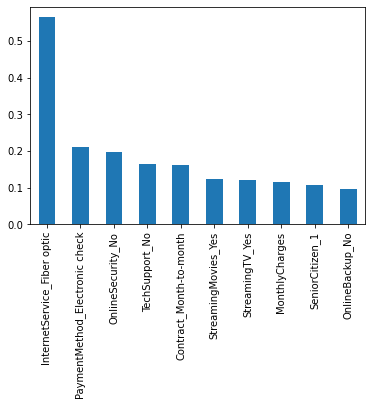

In [33]:
weight_sv = pd.Series(sv2.coef_[0],index=X.columns.values)
weight_sv.sort_values(ascending=False)[:10].plot(kind='bar')

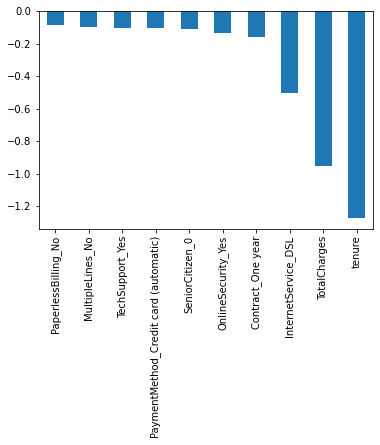

In [34]:
weight_sv.sort_values(ascending=False)[-10:].plot(kind='bar')

## Random Forest Classifier

[[913 133]
 [158 203]]
Random Forest Accuracy Score: 0.7931769722814499
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1046
           1       0.60      0.56      0.58       361

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407

CV Mean: 0.7882522967361931
CV std: 0.013510874319372125


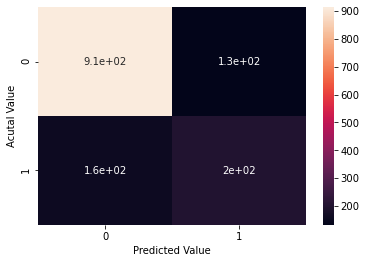

In [42]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
cfm_rf = confusion_matrix(y_test, rf_pred)
print(cfm_rf)
tn5, fp5, fn5, tp5 = cfm_sv2.flatten()
sns.heatmap(cfm_rf, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Acutal Value')
rf_accu = accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy Score:',acc_rf)
print(classification_report(y_test, rf_pred))
rf_cv = cross_val_score(rf, X, y, cv=5, n_jobs=-1)
print('CV Mean:', rf_cv.mean())
print('CV std:', rf_cv.std())

### Hyperparameter Tuning

In [54]:
param_grid_rf = {'n_estimators': [300, 500, 1000],
                'criterion': ['gini','entropy'],
                'max_leaf_nodes': [5,10,15],
                'oob_score': [True]}
param_grid_rf = GridSearchCV(rf,param_grid_rf, cv=5, n_jobs=-1)
param_grid_rf.fit(X_train_scaled, y_train)
param_grid_rf.best_params_

{'criterion': 'gini',
 'max_leaf_nodes': 15,
 'n_estimators': 500,
 'oob_score': True}

In [55]:
param_grid_rf.best_estimator_

RandomForestClassifier(max_leaf_nodes=15, n_estimators=500, oob_score=True,
                       random_state=10)

[[913 133]
 [158 203]]
Random Forest Accuracy Score: 0.7931769722814499
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1046
           1       0.60      0.56      0.58       361

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407

CV Mean: 0.7973536099223452
CV std: 0.007876407387293045


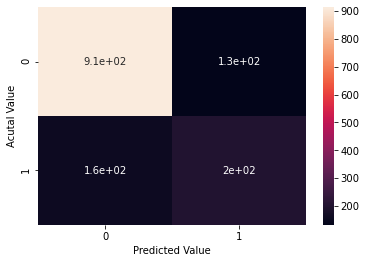

In [57]:
rf2 = RandomForestClassifier(criterion='gini',max_leaf_nodes=15, n_estimators=500, oob_score=True,
                       random_state=10)
rf2.fit(X_train_scaled, y_train)
rf_pred2 = rf.predict(X_test_scaled)
cfm_rf2 = confusion_matrix(y_test, rf_pred2)
tn6, fp6, fn6, tp6 = cfm_rf.flatten()
print(cfm_rf2)
sns.heatmap(cfm_rf2, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Acutal Value')
rf2_accu = accuracy_score(y_test, rf_pred2)
print('Random Forest Accuracy Score:',acc_rf2)
print(classification_report(y_test, rf_pred2))
rf_cv2 = cross_val_score(rf2, X, y, cv=5, n_jobs=-1)
print('CV Mean:', rf_cv2.mean())
print('CV std:', rf_cv2.std())

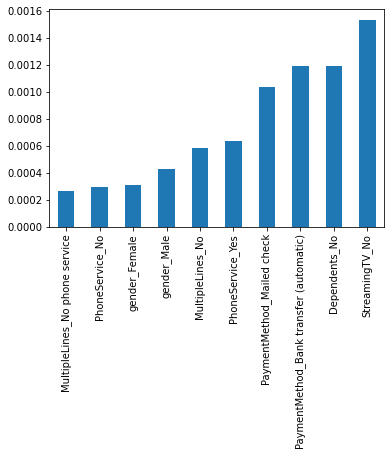

In [58]:
importances = rf2.feature_importances_
weights_rf = pd.Series(importances,index=X.columns.values)
weights_rf.sort_values()[:10].plot(kind='bar')

# Summary

In [65]:
summary = pd.DataFrame({'Algorithm':['Logistic Regression_No Tuning','Logistic Regression Tuned','SVM_No Tuning','SVM Tuned', 'RBF_No Tuning', 'RBF Tuned'], 
                                     'Accuracy Score': ["{:.2%}".format(lr_accu),"{:.2%}".format(lr_accu2),"{:.2%}".format(sv_accu),"{:.2%}".format(sv_accu2),"{:.2%}".format(rf_accu),"{:.2%}".format(rf2_accu)],
                                     'CV Mean': ["{:.2%}".format(lr_cv.mean()), "{:.2%}".format(lr_cv2.mean()),"{:.2%}".format(sv_cv.mean()), "{:.2%}".format(sv_cv2.mean()), "{:.2%}".format(rf_cv.mean()),"{:.2%}".format(rf_cv2.mean())],
                                     'CV Std' : [lr_cv.std(), lr_cv2.std(),sv_cv.std(), sv_cv2.std(), rf_cv.std(),rf_cv2.std()],
                                     'TP': [tp1,tp2,tp3,tp4,tp5,tp6], 
                                     'FP': [fp1,fp2,fp3,fp4,fp5,fp6], 
                                     'TN': [tn1,tn2,tn3,tn4,tn5,tn6], 
                                     'FN': [fn1,fn2,fn3,fn4,fn5,fn6]})
summary

,Algorithm,Accuracy Score,CV Mean,CV Std,TP,FP,TN,FN
0,Logistic Regression_No Tuning,80.81%,80.50%,0.004854,208,117,929,153
1,Logistic Regression Tuned,80.95%,80.47%,0.005069,208,117,929,153
2,SVM_No Tuning,81.24%,79.35%,0.010743,204,107,939,157
3,SVM Tuned,81.02%,79.72%,0.010594,201,107,939,160
4,RBF_No Tuning,79.32%,78.83%,0.013511,204,107,939,157
5,RBF Tuned,79.32%,79.74%,0.007876,203,133,913,158
